## Main Objective
An online bookstore is looking to optimize its website design to improve user engagement and ultimately increase book purchases. The website currently offers two themes for its users: “Light Theme” and “Dark Theme.” The bookstore’s data science team wants to **conduct an A/B testing experiment to determine which theme leads to better user engagement and higher conversion rates for book purchases**.

> Identifying which theme, Light Theme or Dark Theme, yields better user engagement, purchases and conversion rates and also determining if there is a statistically significant difference in the key metrics between the two themes.

### Data Understanding
The data collected by the bookstore contains user interactions and engagement metrics for both the Light Theme and Dark Theme. The dataset includes the following key features:

1. **Theme**: dark or light
2. **Click Through Rate**: The proportion of the users who click on links or buttons on the website.
3. **Conversion Rate**: The percentage of users who signed up on the platform after visiting for the first time.
4. **Bounce Rate**: The percentage of users who leave the website without further interaction after visiting a single page.
5. **Scroll Depth**: The depth to which users scroll through the website pages.
6. **Age**: The age of the user.
7. **Location**: The location of the user.
8. **Session Duration**: The duration of the user’s session on the website.
9. **Purchases**: Whether the user purchased the book (Yes/No).
10. **Added_to_Cart**: Whether the user added books to the cart (Yes/No).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("datasets/website_ab_test.csv")

In [4]:
dataset.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [6]:
# Checking for null values
dataset.isnull().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

### Exploratory Data Analysis
#### How do the click-through rates compare between the Light Theme and Dark Theme?

In [7]:
# Calculate the average Click Through Rate for each theme
theme_ctr = dataset.groupby('Theme')['Click Through Rate'].mean().reset_index()

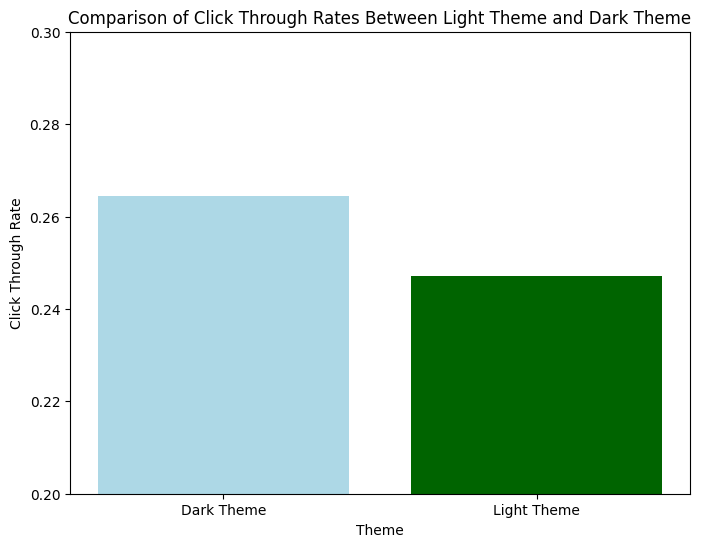

In [47]:
# Plot the comparison
plt.figure(figsize=(8, 6))
plt.bar(theme_ctr['Theme'], theme_ctr['Click Through Rate'], color=['lightblue', 'darkgreen'])
plt.xlabel('Theme')
plt.ylabel('Click Through Rate')
plt.title('Comparison of Click Through Rates Between Light Theme and Dark Theme')
plt.ylim(0.2, 0.3)
plt.show()

> Dark Theme (0.30) has slightly higher average click through rate than Light Theme (0.25)!  

#### What's the difference in conversion rates between the two themes?

In [9]:
# Calculate the average Conversion Rate for each theme
theme_conversion_rate = dataset.groupby('Theme')['Conversion Rate'].mean().reset_index()

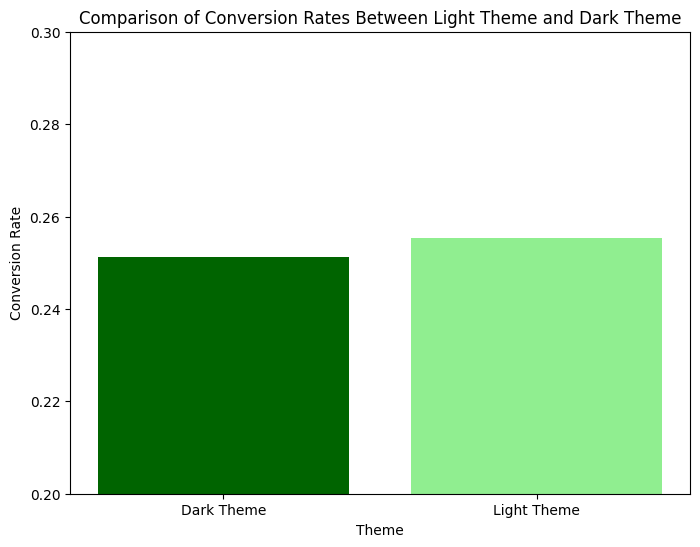

In [46]:
# Plot the comparison
plt.figure(figsize=(8, 6))
plt.bar(theme_conversion_rate['Theme'], theme_conversion_rate['Conversion Rate'], color=['darkgreen', 'lightgreen'])
plt.xlabel('Theme')
plt.ylabel('Conversion Rate')
plt.title('Comparison of Conversion Rates Between Light Theme and Dark Theme')
plt.ylim(0.2, 0.3)
plt.show()

> The Light Theme average conversion rate (0.27) is slightly higher the Dark Theme average conversion rate (0.25)!

#### How do bounce rates vary between the Light Theme and Dark Theme?

In [11]:
# Calculate the average Bounce Rate for each theme
theme_bounce_rate = dataset.groupby('Theme')['Bounce Rate'].mean().reset_index()

In [12]:
theme_bounce_rate

,Theme,Bounce Rate
0,Dark Theme,0.512115
1,Light Theme,0.499035


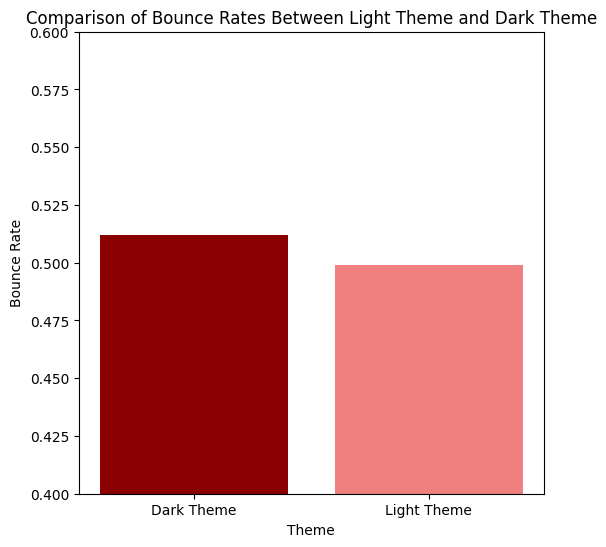

In [45]:
# Plot the comparison
plt.figure(figsize=(6, 6))
plt.bar(theme_bounce_rate['Theme'], theme_bounce_rate['Bounce Rate'], color=['darkred', 'lightcoral'])
plt.xlabel('Theme')
plt.ylabel('Bounce Rate')
plt.title('Comparison of Bounce Rates Between Light Theme and Dark Theme')
plt.ylim(0.4, 0.6)
plt.show()

> The average value of Bounce Rate in Dark Theme (0.512115) is slightly higher than the average value of Bounce Rate in Light Theme (0.499035)!

#### Are there differences in scroll depth between users of the Light Theme and those of the Dark Theme?

In [14]:
# Calculate the average Scroll Depth for each theme
theme_scroll_depth = dataset.groupby('Theme')['Scroll_Depth'].mean().reset_index()

In [15]:
theme_scroll_depth

,Theme,Scroll_Depth
0,Dark Theme,49.926404
1,Light Theme,50.735232


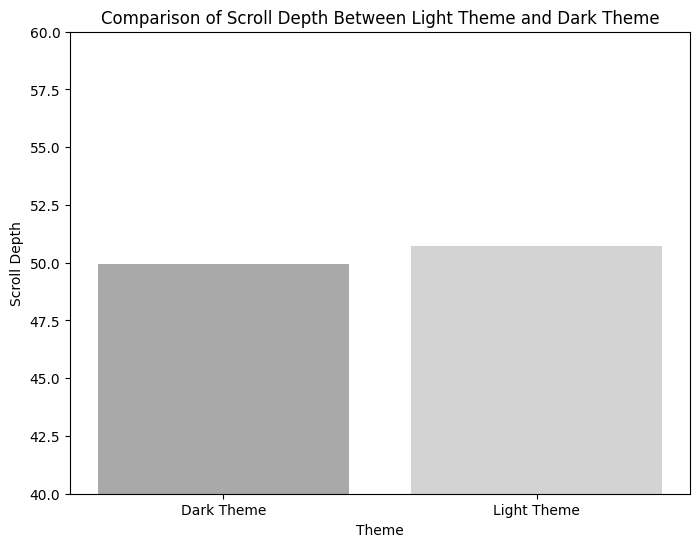

In [44]:
# Plot the comparison
plt.figure(figsize=(8, 6))
plt.bar(theme_scroll_depth['Theme'], theme_scroll_depth['Scroll_Depth'], color=['darkgrey', 'lightgrey'])
plt.xlabel('Theme')
plt.ylabel('Scroll Depth')
plt.title('Comparison of Scroll Depth Between Light Theme and Dark Theme')
plt.ylim(40, 60)
plt.show()

> The average scroll depth in dark theme (49.926404) is slightly lower than the average scroll depth in light theme (50.735232)!

#### What's the average session duration for each theme?

In [17]:
# Calculate the average Session Duration for each theme
theme_session_duration = dataset.groupby('Theme')['Session_Duration'].mean().reset_index()

In [18]:
theme_session_duration

,Theme,Session_Duration
0,Dark Theme,919.482490
1,Light Theme,930.833333


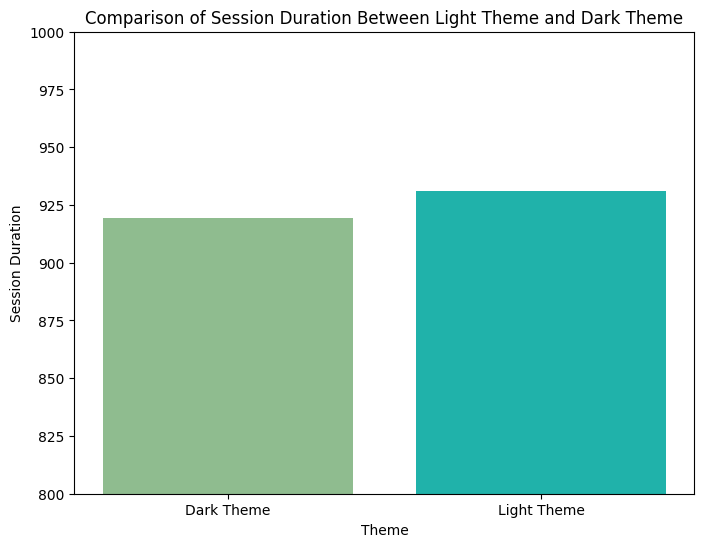

In [43]:
# Plot the comparison
plt.figure(figsize=(8, 6))
plt.bar(theme_session_duration['Theme'], theme_session_duration['Session_Duration'], color=['darkseagreen', 'lightseagreen'])
plt.xlabel('Theme')
plt.ylabel('Session Duration')
plt.title('Comparison of Session Duration Between Light Theme and Dark Theme')
plt.ylim(800, 1000)
plt.show()

> The average session duration in dark theme (919.482490) is slightly higher than the average session duration in light theme (930.833333)!

#### How does the purchase rate (Yes/No) differ between the Light Theme and Dark Theme?

In [20]:
# Count the number of 'Yes' and 'No' purchases for each theme
theme_purchase_rate = dataset.groupby(['Theme', 'Purchases']).size().unstack(fill_value=0)

In [21]:
theme_purchase_rate

Purchases,No,Yes
Theme,,
Dark Theme,255,259
Light Theme,228,258


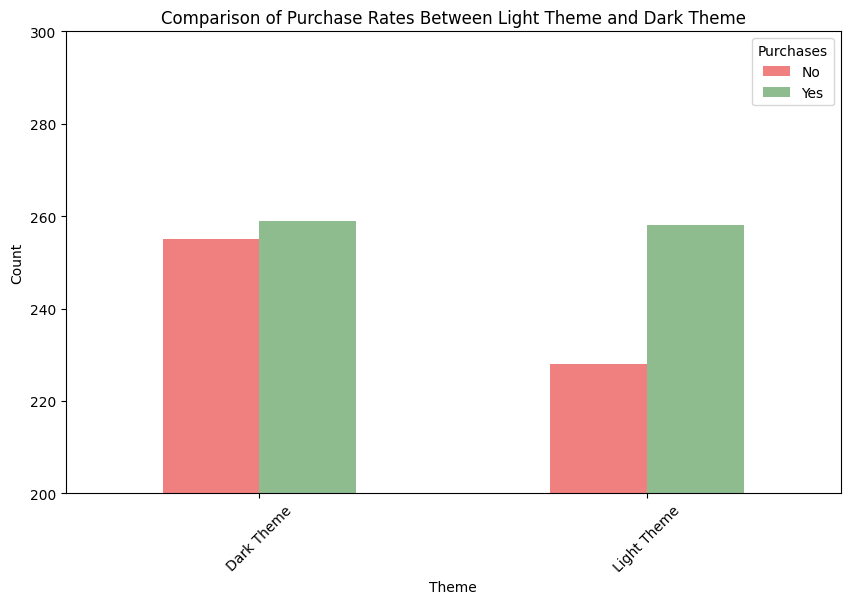

In [42]:
# Plot the comparison using a grouped bar chart
theme_purchase_rate.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'darkseagreen'])
plt.xlabel('Theme')
plt.ylabel('Count')
plt.title('Comparison of Purchase Rates Between Light Theme and Dark Theme')
plt.legend(title='Purchases')
plt.xticks(rotation=45)
plt.ylim(200, 300)
plt.show()


> The difference in amount of users purchased and don't is very small in 'Dark Theme'! Not_Purchased: 255, Purchased: 259  
In the 'Light Theme' there are more users that purchased the book than the users don't! Not_Purchased: 228, Purchased: 258

#### Is there a variation in 'Added to Cart' behavior between the two themes?

In [23]:
theme_added_to_cart = dataset.groupby(['Theme', 'Added_to_Cart']).size().unstack(fill_value=0)

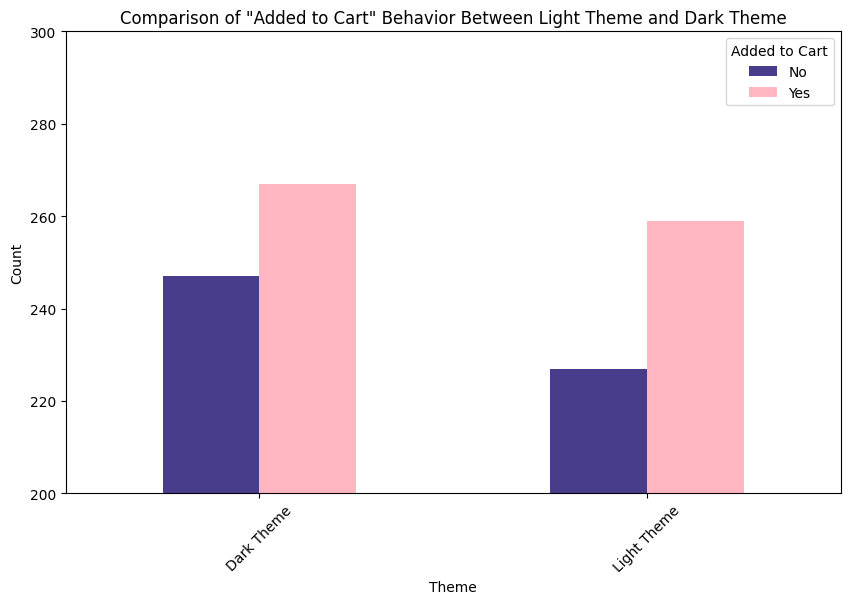

In [41]:
# Plot the comparison using a grouped bar chart
theme_added_to_cart.plot(kind='bar', figsize=(10, 6), color=['darkslateblue', 'lightpink'])
plt.xlabel('Theme')
plt.ylabel('Count')
plt.title('Comparison of "Added to Cart" Behavior Between Light Theme and Dark Theme')
plt.legend(title='Added to Cart')
plt.xticks(rotation=45)
plt.ylim(200, 300)
plt.show()

> It seems there is no variation in 'Added_To_Cart' behaviour between the two groups. In both groups, the number of users that have added books to their cards (Added_To_Cart  = YES) is higher than the users who haven't (Added_To_Cart = No)!

#### Does age impact user engagement metrics differently across the Light and Dark Themes?

In [25]:
# Creating Age Groups
bins = [0, 18, 35, 50, 70, 100]
labels = ['Teenager', 'Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior Adult']
dataset['Age_Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

In [26]:
engagement_metrics = dataset.groupby(['Theme', 'Age_Group'], observed=False).agg({
    'Click Through Rate': 'mean',
    'Conversion Rate': 'mean',
    'Scroll_Depth': 'mean',
    'Session_Duration': 'mean'
}).reset_index()

In [33]:
engagement_metrics

,Theme,Age_Group,Click Through Rate,Conversion Rate,Scroll_Depth,Session_Duration
0,Dark Theme,Teenager,NaN,NaN,NaN,NaN
1,Dark Theme,Young Adult,0.271616,0.250505,49.875431,901.566138
2,Dark Theme,Adult,0.254539,0.248680,50.052143,913.244898
3,Dark Theme,Middle-Aged Adult,0.265173,0.254256,49.876685,943.657303
4,Dark Theme,Senior Adult,NaN,NaN,NaN,NaN
5,Light Theme,Teenager,NaN,NaN,NaN,NaN
6,Light Theme,Young Adult,0.242299,0.244122,50.243203,933.390244
7,Light Theme,Adult,0.249845,0.269960,51.390525,943.549383
8,Light Theme,Middle-Aged Adult,0.249268,0.252398,50.576077,915.337500
9,Light Theme,Senior Adult,NaN,NaN,NaN,NaN


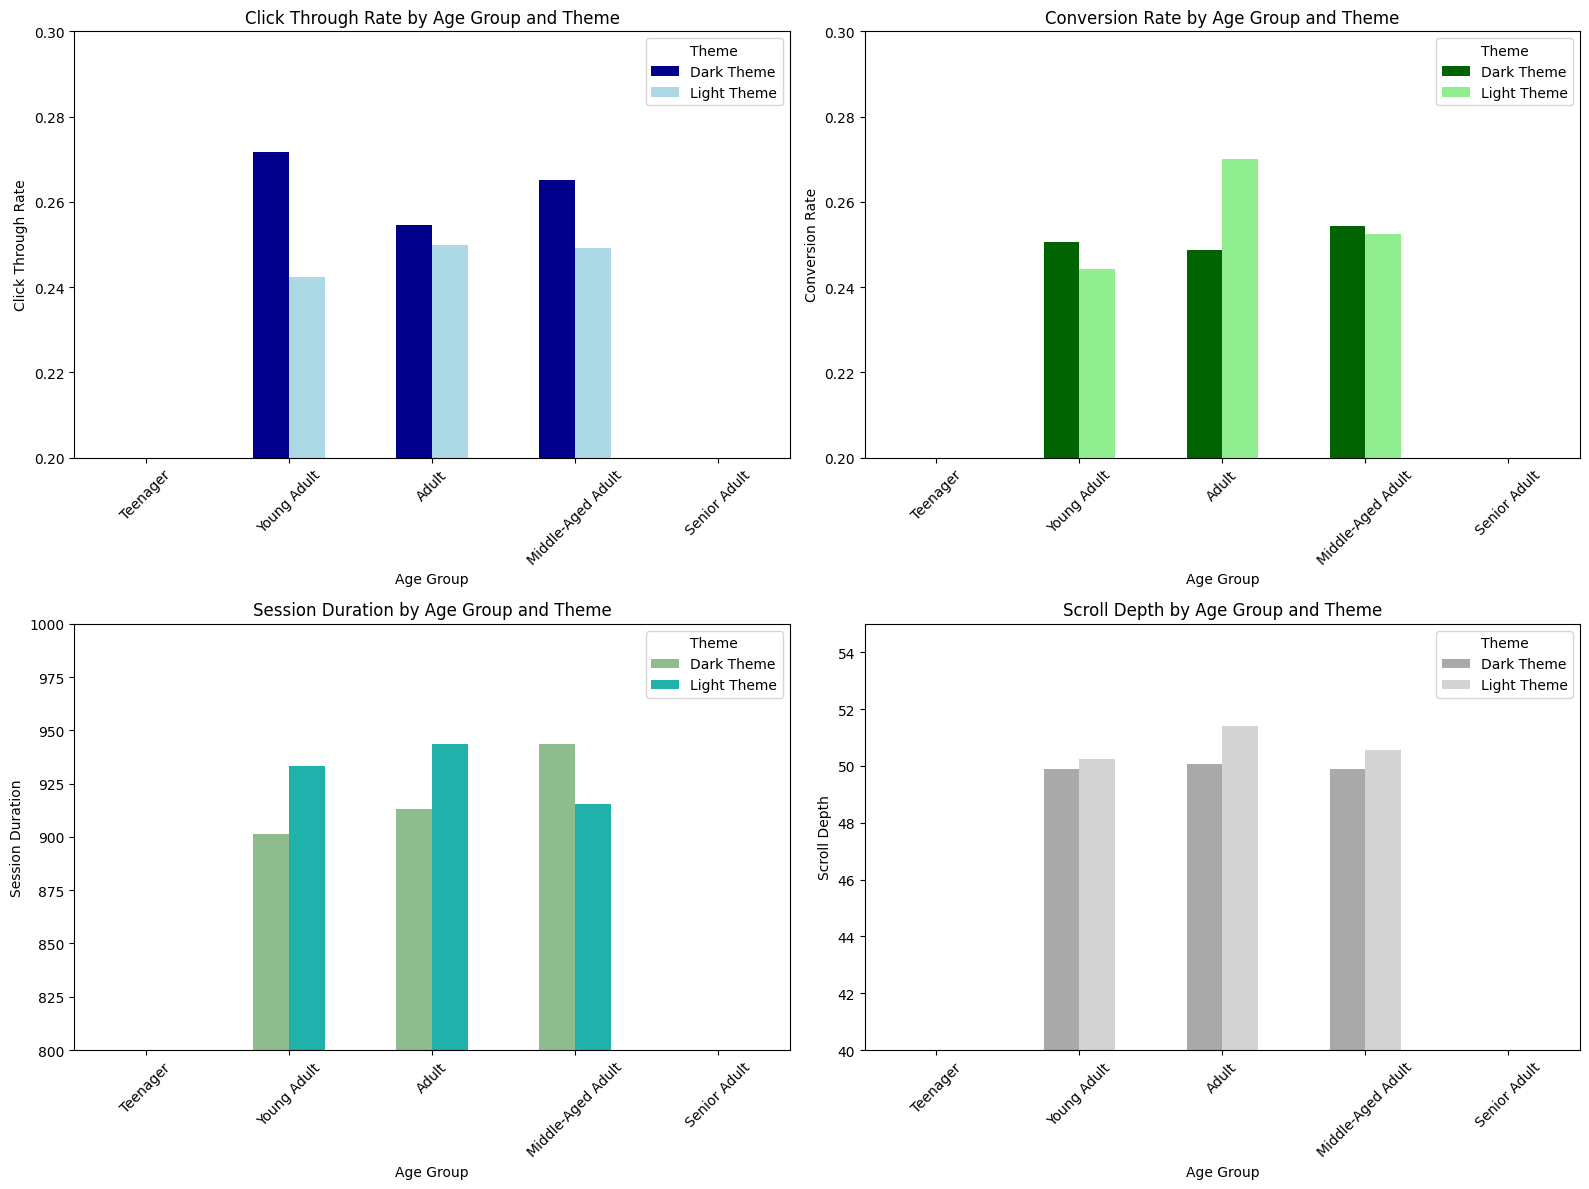

In [38]:
# Plot the comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Click Through Rate
engagement_metrics.pivot(index='Age_Group', columns='Theme', values='Click Through Rate').plot(kind='bar', ax=axes[0, 0], color=['darkblue', 'lightblue'])
axes[0, 0].set_title('Click Through Rate by Age Group and Theme')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Click Through Rate')
axes[0, 0].set_xticklabels(labels, rotation=45)
axes[0, 0].set_ylim(0.2, 0.3)

# Conversion Rate
engagement_metrics.pivot(index='Age_Group', columns='Theme', values='Conversion Rate').plot(kind='bar', ax=axes[0, 1], color=['darkgreen', 'lightgreen'])
axes[0, 1].set_title('Conversion Rate by Age Group and Theme')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Conversion Rate')
axes[0, 1].set_xticklabels(labels, rotation=45)
axes[0, 1].set_ylim(0.2, 0.3)

# Session Duration
engagement_metrics.pivot(index='Age_Group', columns='Theme', values='Session_Duration').plot(kind='bar', ax=axes[1, 0], color=['darkseagreen', 'lightseagreen'])
axes[1, 0].set_title('Session Duration by Age Group and Theme')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Session Duration')
axes[1, 0].set_xticklabels(labels, rotation=45)
axes[1, 0].set_ylim(800, 1000)

# Scroll Depth
engagement_metrics.pivot(index='Age_Group', columns='Theme', values='Scroll_Depth').plot(kind='bar', ax=axes[1, 1], color=['darkgrey', 'lightgrey'])
axes[1, 1].set_title('Scroll Depth by Age Group and Theme')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Scroll Depth')
axes[1, 1].set_xticklabels(labels, rotation=45)
axes[1, 1].set_ylim(40, 55)

plt.tight_layout()
plt.show()

> There are only three age groups: 'Young Adult', 'Adult', and 'Middle-Aged Adult'.  
The average Click Through Rate in the Dark Theme is higher across all three age groups compared to the Light Theme.  
The average Conversion Rate in 'Young Adult' and 'Middle-Aged Adult' groups is higher in the Dark Theme, while in the 'Adult' group, the average Conversion Rate is higher in the Light Theme.  
The average Session Duration in the Light Theme is higher in the 'Adult' and 'Young Adult' groups, but lower in the 'Middle-Aged Adult' group compared to the Dark Theme.  
The average Scroll Depth in the Light Theme is higher across all three age groups compared to the Dark Theme.

#### How does location influence the effectiveness of each theme?